##TCS iON Internship

### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
plt.rcParams['figure.figsize'] = (8,6)

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset into Python Environment

In [ ]:
from google.colab import files
files.upload()

In [3]:
data=pd.read_csv('salary_data.csv')
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [6]:
data.shape

(32561, 14)

In [7]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

While analyzing the dataset, it is clear that capital-gain & capital_loss have no effect on salary prediction. so we can drop it. We also drop the column education-num, which is the numerical version of the column education.

In [8]:
data.drop(['capital-gain','capital-loss','education-num'],axis=1,inplace=True)
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


###Exploratory Data Analysis EDA

In [9]:
cat_cols = data.columns[data.dtypes == 'object']
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

In [10]:
for cols in cat_cols:
    print(data[cols].value_counts(), '\n')

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64 

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64 

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64 

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical      

Found '?' in columns occupation, workclass, and native-country.
Replace this using mode

In [11]:
data[(data == '?').any(axis = 1)]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
14,40,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,40,?,>50K
27,54,?,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,60,South,>50K
38,31,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,38,?,>50K
51,18,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,30,?,<=50K
61,32,?,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,55,United-States,>50K
32531,30,?,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,99,United-States,<=50K
32539,71,?,Doctorate,Married-civ-spouse,?,Husband,White,Male,10,United-States,>50K
32541,41,?,HS-grad,Separated,?,Not-in-family,Black,Female,32,United-States,<=50K


In [12]:
data['workclass'].mode()

0    Private
Name: workclass, dtype: object

In [13]:
data['occupation'].mode()

0    Prof-specialty
Name: occupation, dtype: object

In [14]:
data['native-country'].mode()

0    United-States
Name: native-country, dtype: object

In [15]:
# Replacing '?' with the mode values for each column
data['workclass'] = data['workclass'].replace('?','Private')
data['occupation']=data['occupation'].replace('?','Prof-speciality')
data['native-country']=data['native-country'].replace('?','United-States')

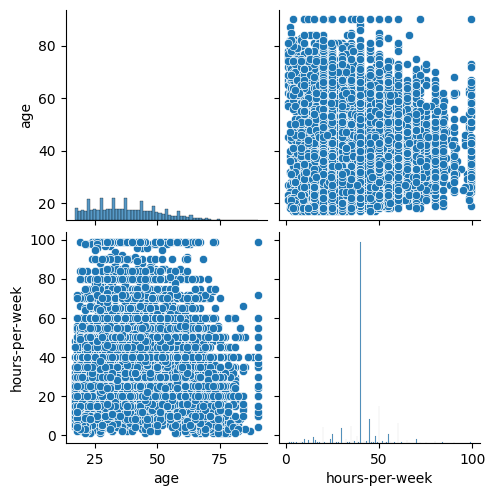

In [17]:
sns.pairplot(data)
plt.show()

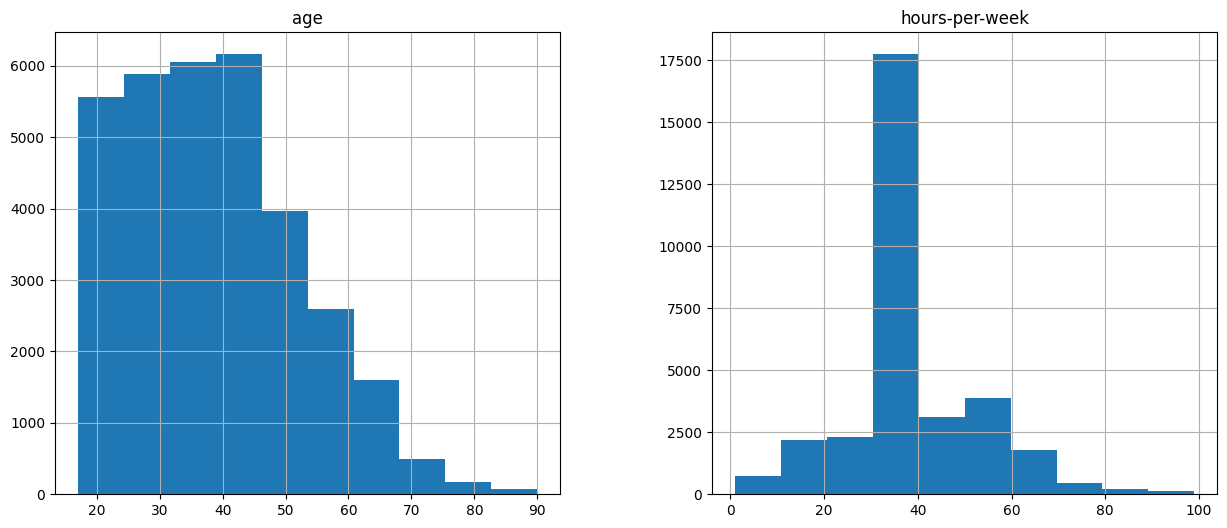

In [18]:
data.hist(figsize=(15,6))
plt.show()

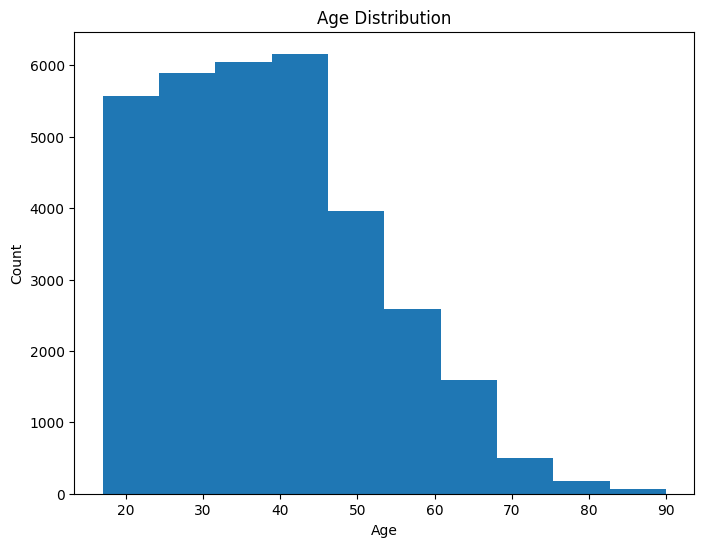

In [19]:
#We can check the above using some representations like graphs, barplots, etc

#checking age

plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
# plt.xticks(np.arange(20,100,5))
# plt.rcParams['figure.figsize'] = (8,8)
plt.title('Age Distribution')
plt.show()

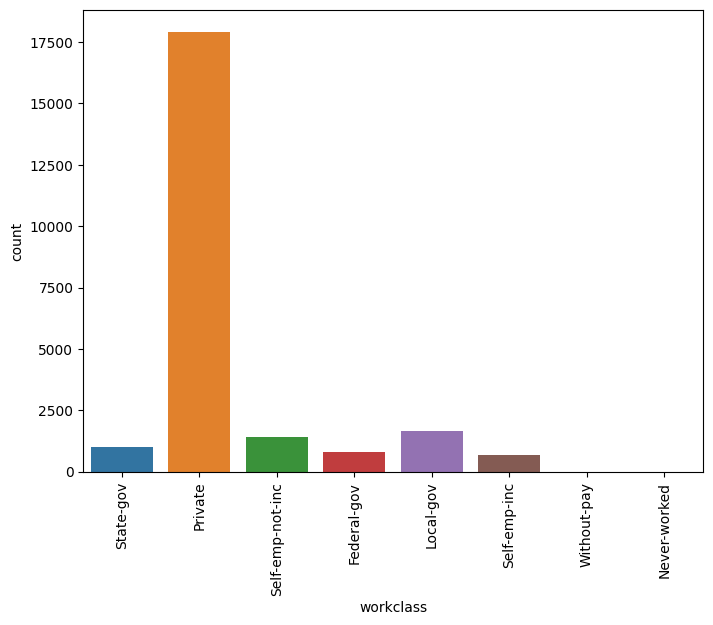

In [36]:
#checking workclass

sns.countplot(x = data['workclass'], data = data)
plt.xticks(rotation = 90)
plt.show()

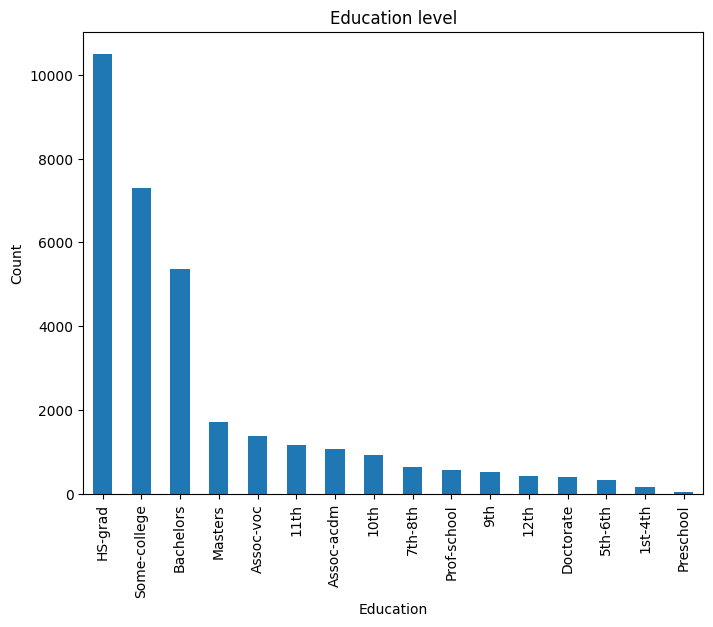

In [22]:
#checking education

data['education'].value_counts().plot(kind = 'bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education level')
plt.show()

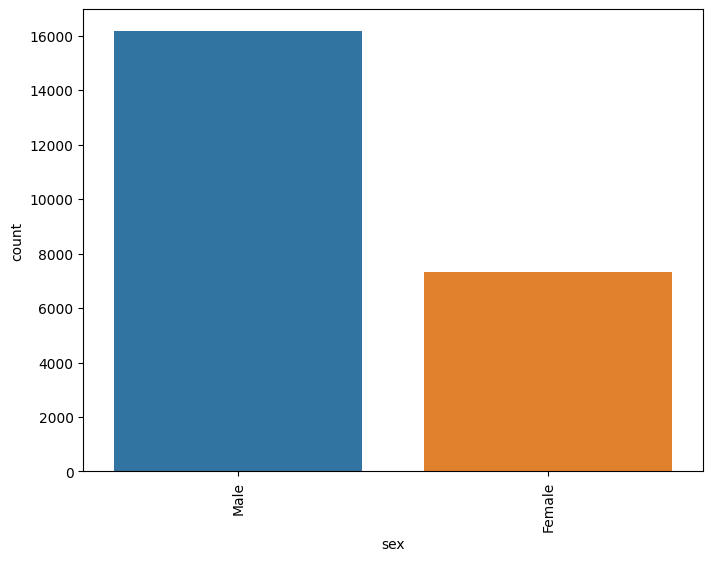

In [43]:
#checking sex

sns.countplot(x = data['sex'], data = data)
plt.xticks(rotation = 90)
plt.show()

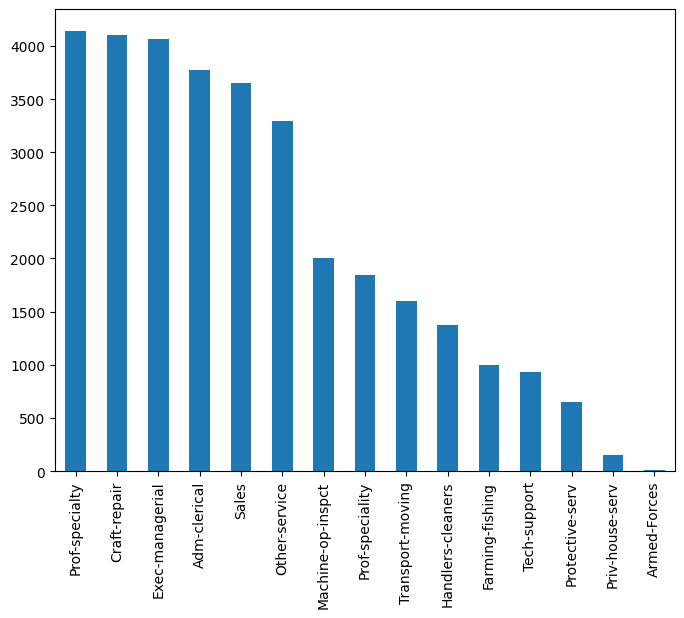

In [24]:
#checking occupation

data['occupation'].value_counts().plot(kind = 'bar')
plt.show()

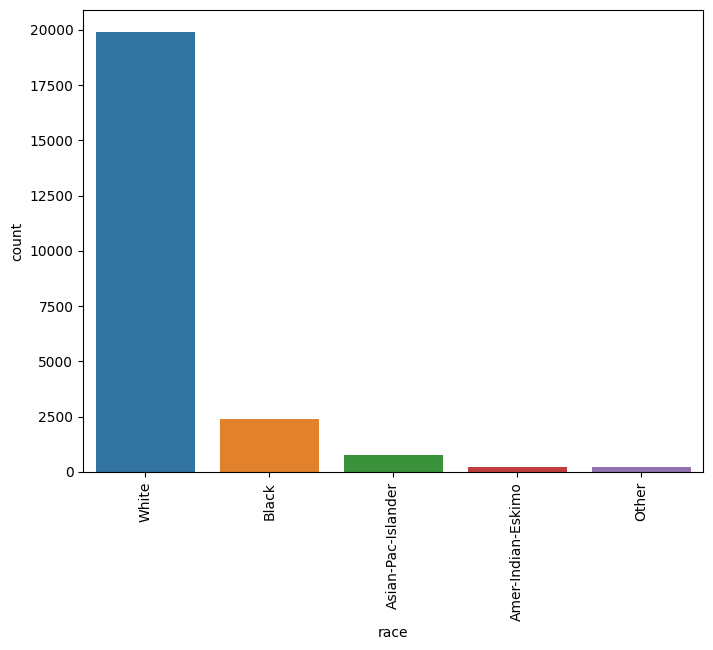

In [37]:
#Checking race

sns.countplot(x = data['race'], data = data)
plt.xticks(rotation = 90)
plt.show()

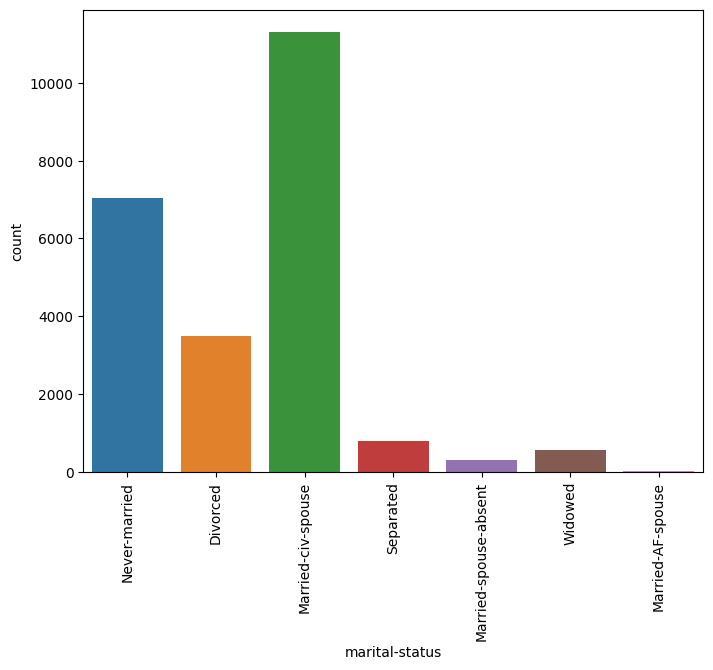

In [38]:
#checking marital-status

sns.countplot(x = data['marital-status'], data = data)
plt.xticks(rotation = 90)
plt.show()

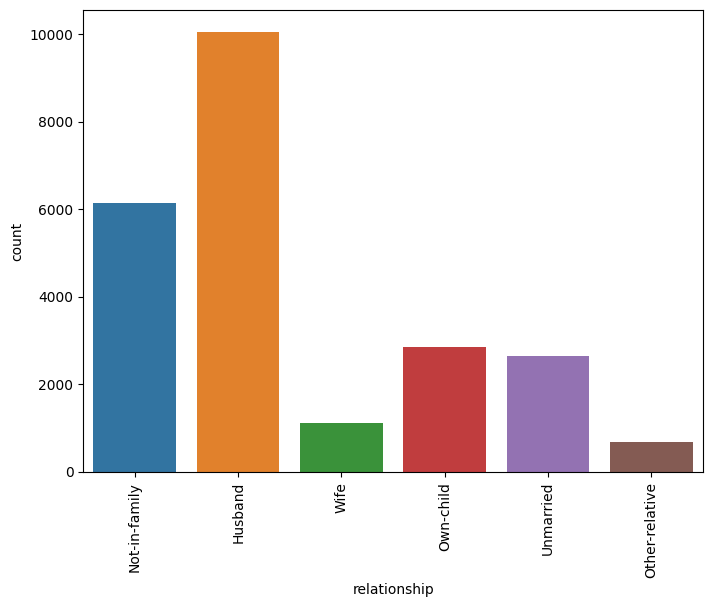

In [39]:
#checking relationship

sns.countplot(x = data['relationship'], data = data)
plt.xticks(rotation = 90)
plt.show()

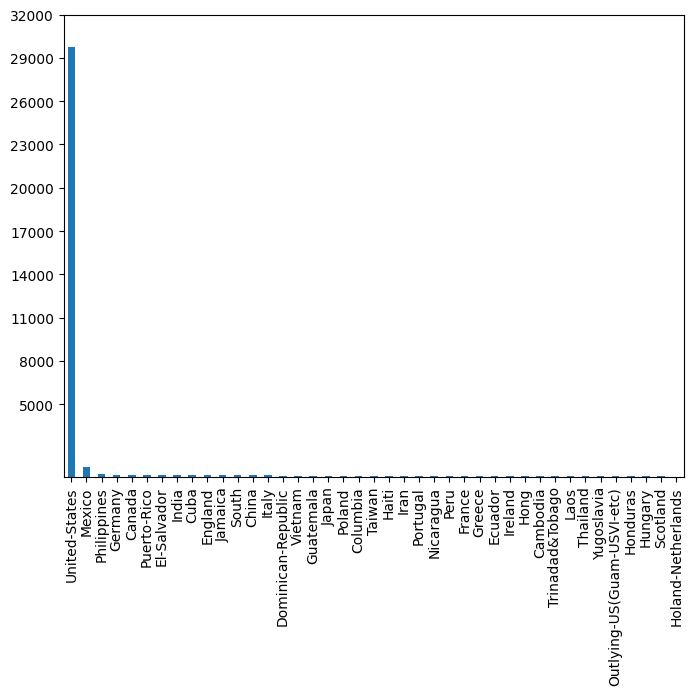

In [28]:
#checking native-country

data['native-country'].value_counts().plot(kind = 'bar')
plt.yticks(np.arange(5000,33000,3000))
plt.show()

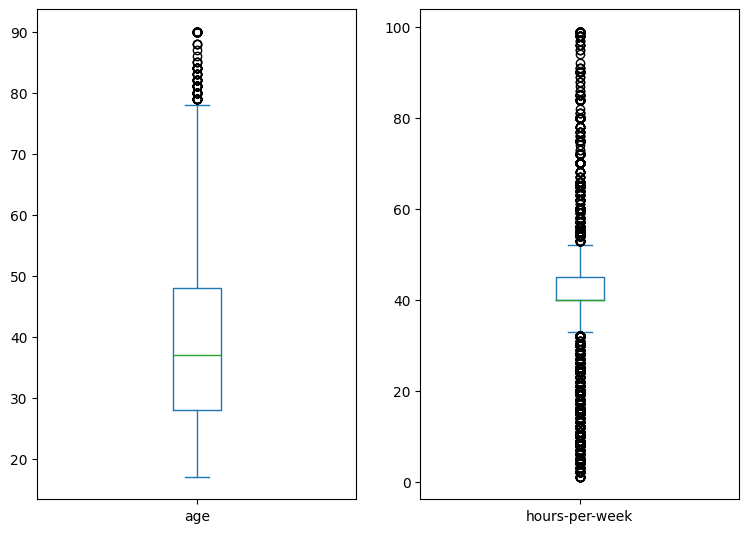

In [30]:
data.plot(kind='box',subplots=True,layout=(2,3),figsize=(14,14));

From the figure it is clear that age and hours-per-week have outliers. So we should remove it

In [31]:
#Outlier handling of age

Q1=np.percentile(data['age'],25,interpolation='midpoint')
Q2=np.percentile(data['age'],50,interpolation='midpoint')
Q3=np.percentile(data['age'],75,interpolation='midpoint')
IQR=Q3-Q1
print(Q1,Q2,Q3)
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print('low_limit=',low_limit)
print('up_limit=',up_limit)
outlier=[]
for x in data['age']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

indA=data['age']>up_limit
indA1=data.loc[indA].index
indB=data['age']<low_limit
indB1=data.loc[indB].index

data.drop(indA1,inplace=True)
data.drop(indB1,inplace=True)

28.0 37.0 48.0
low_limit= -2.0
up_limit= 78.0


Text(0.5, 1.0, 'Box plot of age after removal of outlier')

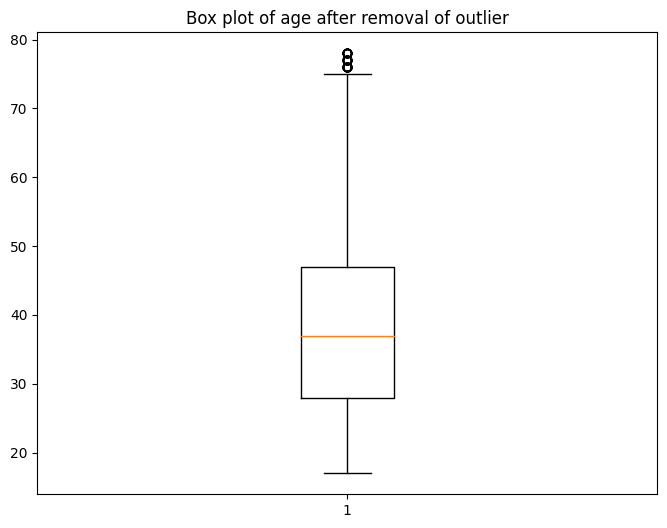

In [32]:
plt.boxplot(data['age'])
plt.title('Box plot of age after removal of outlier')

In [33]:
#Outlier handling of hours-per-week

Q1=np.percentile(data['hours-per-week'],25,interpolation='midpoint')
Q2=np.percentile(data['hours-per-week'],50,interpolation='midpoint')
Q3=np.percentile(data['hours-per-week'],75,interpolation='midpoint')
IQR=Q3-Q1
print(Q1,Q2,Q3)
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print('low_limit=',low_limit)
print('up_limit=',up_limit)
outlier=[]
for x in data['hours-per-week']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

indA=data['hours-per-week']>up_limit
indA1=data.loc[indA].index
indB=data['hours-per-week']<low_limit
indB1=data.loc[indB].index

data.drop(indA1,inplace=True)
data.drop(indB1,inplace=True)

40.0 40.0 45.0
low_limit= 32.5
up_limit= 52.5


Text(0.5, 1.0, 'Box plot of hours-per-week after removal of outlier')

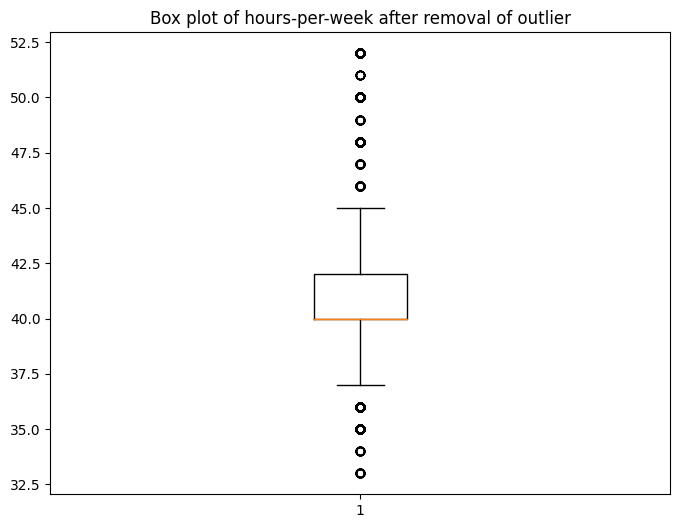

In [34]:
plt.boxplot(data['hours-per-week'])
plt.title('Box plot of hours-per-week after removal of outlier')

In [35]:
data.shape

(23499, 11)

Outliers are handled and shape reduced from (32561,14) to (23499,11)